In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

Create model

In [11]:
# Define the model

def conv_batchnorm_relu(input_layer, filters, kernel_size, strides):
    conv_layer = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(input_layer)
    batchnorm_layer = tf.keras.layers.BatchNormalization()(conv_layer)
    relu_layer = tf.keras.layers.ReLU()(batchnorm_layer)
    return relu_layer

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # First layer
    conv1 = conv_batchnorm_relu(inputs, filters=16, kernel_size=(3, 3), strides=(1, 1))
    maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(conv1)
    
    # Second layer
    conv2 = conv_batchnorm_relu(maxpool1, filters=32, kernel_size=(3, 3), strides=(1, 1))
    maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv2)
    
    # Third layer
    conv3 = conv_batchnorm_relu(maxpool2, filters=64, kernel_size=(3, 3), strides=(1, 1))
    avgpool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv3)
    
    # Flatten the output of the last convolutional layer
    flatten = tf.keras.layers.Flatten()(avgpool)
    
    # Fully connected layers
    fc1 = tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
    fc2 = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(fc1)

    # Output layer (binary classification)
    output = tf.keras.layers.Dense(10, activation='softmax')(fc2)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output)
    return model

# Example usage
input_shape = (160, 160, 1)  # Assuming input images are 32x32 RGB images


model = create_model(input_shape)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      160       
                                                                 
 batch_normalization_3 (Bat  (None, 160, 160, 16)      64        
 chNormalization)                                                
                                                                 
 re_lu_3 (ReLU)              (None, 160, 160, 16)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 40, 40, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 32)        4640

Loading images

In [14]:
folder1_path = '.\persons\person1'
folder2_path = '.\persons\person2'
folder3_path = '.\persons\person3'
folder4_path = '.\persons\person4'
folder5_path = '.\persons\person5'
folder6_path = '.\persons\person6'
folder7_path = '.\persons\person7'
folder8_path = '.\persons\person8'
folder9_path = '.\persons\person9'
folder10_path = '.\persons\person10'

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename),cv2.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
    return images

  

images_for_person1 = load_images_from_folder(folder1_path)
images_for_person2 = load_images_from_folder(folder2_path)


images_for_person3 = load_images_from_folder(folder3_path)
images_for_person4 = load_images_from_folder(folder4_path)
images_for_person5 = load_images_from_folder(folder5_path)
images_for_person6 = load_images_from_folder(folder6_path)
images_for_person7 = load_images_from_folder(folder7_path)
images_for_person8 = load_images_from_folder(folder8_path)
images_for_person9 = load_images_from_folder(folder9_path)
images_for_person10 = load_images_from_folder(folder10_path)





indices_to_separate = [2, 5, 10, 11, 12, 13, 15, 39, 40, 41, 42, 44, 64]

# Separating indices for person 1
testing_indices_person1 = indices_to_separate.copy()
testing_images_person1 = [images_for_person1[i] for i in testing_indices_person1]
remaining_indices_person1 = np.setdiff1d(np.arange(len(images_for_person1)), testing_indices_person1)
training_images_person1 = [images_for_person1[i] for i in remaining_indices_person1]

# Separating indices for person 2
testing_indices_person2 = indices_to_separate.copy()
testing_images_person2 = [images_for_person2[i] for i in testing_indices_person2]
remaining_indices_person2 = np.setdiff1d(np.arange(len(images_for_person2)), testing_indices_person2)
training_images_person2 = [images_for_person2[i] for i in remaining_indices_person2]





testing_indices_person3 = indices_to_separate.copy()
testing_images_person3 = [images_for_person3[i] for i in testing_indices_person3]
remaining_indices_person3 = np.setdiff1d(np.arange(len(images_for_person3)), testing_indices_person3)
training_images_person3 = [images_for_person3[i] for i in remaining_indices_person3]

testing_indices_person4 = indices_to_separate.copy()
testing_images_person4 = [images_for_person4[i] for i in testing_indices_person4]
remaining_indices_person4 = np.setdiff1d(np.arange(len(images_for_person4)), testing_indices_person4)
training_images_person4 = [images_for_person4[i] for i in remaining_indices_person4]

testing_indices_person5 = indices_to_separate.copy()
testing_images_person5 = [images_for_person5[i] for i in testing_indices_person5]
remaining_indices_person5 = np.setdiff1d(np.arange(len(images_for_person5)), testing_indices_person5)
training_images_person5 = [images_for_person5[i] for i in remaining_indices_person5]

testing_indices_person6 = indices_to_separate.copy()
testing_images_person6 = [images_for_person6[i] for i in testing_indices_person6]
remaining_indices_person6 = np.setdiff1d(np.arange(len(images_for_person6)), testing_indices_person6)
training_images_person6 = [images_for_person6[i] for i in remaining_indices_person6]

testing_indices_person7 = indices_to_separate.copy()
testing_images_person7 = [images_for_person7[i] for i in testing_indices_person7]
remaining_indices_person7 = np.setdiff1d(np.arange(len(images_for_person7)), testing_indices_person7)
training_images_person7 = [images_for_person7[i] for i in remaining_indices_person7]

testing_indices_person8 = indices_to_separate.copy()
testing_images_person8 = [images_for_person8[i] for i in testing_indices_person8]
remaining_indices_person8 = np.setdiff1d(np.arange(len(images_for_person8)), testing_indices_person8)
training_images_person8 = [images_for_person8[i] for i in remaining_indices_person8]

testing_indices_person9 = indices_to_separate.copy()
testing_images_person9 = [images_for_person9[i] for i in testing_indices_person9]
remaining_indices_person9 = np.setdiff1d(np.arange(len(images_for_person9)), testing_indices_person9)
training_images_person9 = [images_for_person9[i] for i in remaining_indices_person9]

testing_indices_person10 = indices_to_separate.copy()
testing_images_person10 = [images_for_person10[i] for i in testing_indices_person10]
remaining_indices_person10 = np.setdiff1d(np.arange(len(images_for_person10)), testing_indices_person10)
training_images_person10 = [images_for_person10[i] for i in remaining_indices_person10]

Data augmentation

In [16]:
# Function to perform image sharpening
def sharpen_image(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Function to perform image flipping
def flip_image(image):
    flipped = cv2.flip(image, 1)  # 1 for horizontal flipping
    return flipped

# Perform data augmentation for person 1
augmented_training_images_person1 = []
for image in training_images_person1:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person1.append(sharpened_image)
    augmented_training_images_person1.append(flipped_image)

# Perform data augmentation for person 2
augmented_training_images_person2 = []
for image in training_images_person2:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person2.append(sharpened_image)
    augmented_training_images_person2.append(flipped_image)




augmented_training_images_person3 = []
for image in training_images_person3:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person3.append(sharpened_image)
    augmented_training_images_person3.append(flipped_image)

augmented_training_images_person4 = []
for image in training_images_person4:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person4.append(sharpened_image)
    augmented_training_images_person4.append(flipped_image)

augmented_training_images_person5 = []
for image in training_images_person5:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person5.append(sharpened_image)
    augmented_training_images_person5.append(flipped_image)

augmented_training_images_person6 = []
for image in training_images_person6:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person6.append(sharpened_image)
    augmented_training_images_person6.append(flipped_image)

augmented_training_images_person7 = []
for image in training_images_person7:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person7.append(sharpened_image)
    augmented_training_images_person7.append(flipped_image)

augmented_training_images_person8 = []
for image in training_images_person8:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person8.append(sharpened_image)
    augmented_training_images_person8.append(flipped_image)

augmented_training_images_person9 = []
for image in training_images_person9:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person9.append(sharpened_image)
    augmented_training_images_person9.append(flipped_image)

augmented_training_images_person10 = []
for image in training_images_person10:
    sharpened_image = sharpen_image(image)
    flipped_image = flip_image(image)
    augmented_training_images_person10.append(sharpened_image)
    augmented_training_images_person10.append(flipped_image)                    

# Convert lists to numpy arrays
augmented_training_images_person1 = np.array(augmented_training_images_person1)
augmented_training_images_person2 = np.array(augmented_training_images_person2)

augmented_training_images_person3 = np.array(augmented_training_images_person3)
augmented_training_images_person4 = np.array(augmented_training_images_person4)
augmented_training_images_person5 = np.array(augmented_training_images_person5)
augmented_training_images_person6 = np.array(augmented_training_images_person6)
augmented_training_images_person7 = np.array(augmented_training_images_person7)
augmented_training_images_person8 = np.array(augmented_training_images_person8)
augmented_training_images_person9 = np.array(augmented_training_images_person9)
augmented_training_images_person10 = np.array(augmented_training_images_person10)

Prepare data to feeding

In [17]:
#concatenate the 2 training array and labeling crossponding index in y_train
X_train = np.concatenate((augmented_training_images_person1, augmented_training_images_person2, augmented_training_images_person3, augmented_training_images_person4, augmented_training_images_person5, augmented_training_images_person6, augmented_training_images_person7, augmented_training_images_person8, augmented_training_images_person9, augmented_training_images_person10))
y_train = np.concatenate((
    np.zeros(len(augmented_training_images_person1)),
    np.ones(len(augmented_training_images_person2)),
    np.full(len(augmented_training_images_person3), 2),
    np.full(len(augmented_training_images_person4), 3),
    np.full(len(augmented_training_images_person5), 4),
    np.full(len(augmented_training_images_person6), 5),
    np.full(len(augmented_training_images_person7), 6),
    np.full(len(augmented_training_images_person8), 7),
    np.full(len(augmented_training_images_person9), 8),
    np.full(len(augmented_training_images_person10), 9)
))

# Shuffle the data
shuffle_indices = np.random.permutation(len(X_train))
X_train_shuffled = X_train[shuffle_indices]
y_train_shuffled = y_train[shuffle_indices]
y_train_one_hot = tf.keras.utils.to_categorical(y_train_shuffled, num_classes=10)

Compile and train model

Epoch 1/100
42/42 [==============================] - 11s 182ms/step - loss: 2.5592 - accuracy: 0.2401 - val_loss: 3.1069 - val_accuracy: 0.2010
Epoch 2/100
42/42 [==============================] - 7s 177ms/step - loss: 1.1859 - accuracy: 0.7719 - val_loss: 1.5276 - val_accuracy: 0.5072
Epoch 3/100
42/42 [==============================] - 7s 177ms/step - loss: 0.5879 - accuracy: 0.9340 - val_loss: 0.7512 - val_accuracy: 0.8565
Epoch 4/100
42/42 [==============================] - 8s 182ms/step - loss: 0.3734 - accuracy: 0.9772 - val_loss: 0.5541 - val_accuracy: 0.8995
Epoch 5/100
42/42 [==============================] - 7s 175ms/step - loss: 0.3220 - accuracy: 0.9832 - val_loss: 0.4589 - val_accuracy: 0.9378
Epoch 6/100
42/42 [==============================] - 7s 175ms/step - loss: 0.2827 - accuracy: 0.9820 - val_loss: 0.3089 - val_accuracy: 0.9809
Epoch 7/100
42/42 [==============================] - 7s 177ms/step - loss: 0.2609 - accuracy: 0.9856 - val_loss: 0.3090 - val_accuracy: 0.966

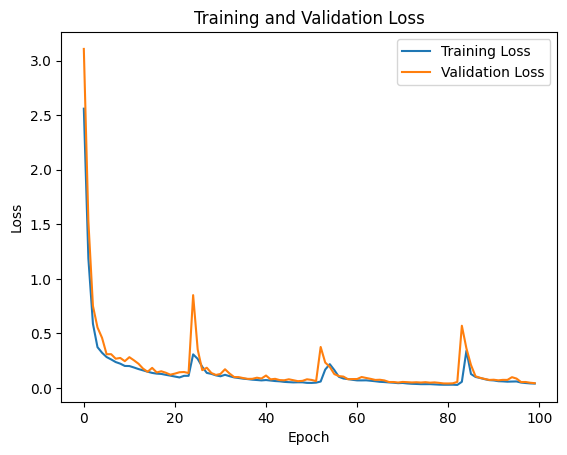

In [18]:
import matplotlib.pyplot as plt

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(X_train_shuffled, y_train_one_hot, epochs=100, batch_size=20, validation_split=0.2)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 

Prepare test data to feeding 

In [9]:
testing_images_person2 = np.array(testing_images_person2)
testing_images_person1 = np.array(testing_images_person1)
testing_images_person3 = np.array(testing_images_person3)
testing_images_person4 = np.array(testing_images_person4)
testing_images_person5 = np.array(testing_images_person5)
testing_images_person6 = np.array(testing_images_person6)
testing_images_person7 = np.array(testing_images_person7)
testing_images_person8 = np.array(testing_images_person8)
testing_images_person9 = np.array(testing_images_person9)
testing_images_person10 = np.array(testing_images_person10)

X_test=np.concatenate((testing_images_person1, testing_images_person2, testing_images_person3, testing_images_person4, testing_images_person5, testing_images_person6, testing_images_person7, testing_images_person8, testing_images_person9, testing_images_person10))
y_test = np.concatenate((np.zeros(len(testing_images_person1)), np.ones(len(testing_images_person2)), np.full(len(testing_images_person2),2), np.full(len(testing_images_person2),3), np.full(len(testing_images_person2),4), np.full(len(testing_images_person2),5), np.full(len(testing_images_person2),6), np.full(len(testing_images_person2),7), np.full(len(testing_images_person2),8), np.full(len(testing_images_person2),9)))

shuffle_indices2 = np.random.permutation(len(X_test))
X_test_shuffled = X_test[shuffle_indices2]
y_test_shuffled = y_test[shuffle_indices2]

y_test_one_hot = tf.keras.utils.to_categorical(y_test_shuffled, num_classes=10)

Test the model with testing data

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test_shuffled)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1 score
f1 = f1_score(y_test_shuffled, y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test_shuffled, y_pred_binary)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 194ms/step
F1 Score: 1.0
Accuracy: 1.0
